In [181]:
import geopandas as gpd
import pandas as pd
import gudhi
import matplotlib.pyplot as plt
gudhi.persistence_graphical_tools._gudhi_matplotlib_use_tex=False

In [182]:
SHAPE_PATH = "dataset/shapefiles/001-alameda.shp"
VOTES_PATH = "dataset/final-results/001-alameda.csv"

shapes_gdf = gpd.read_file(SHAPE_PATH)
votes_df = pd.read_csv(VOTES_PATH)

In [183]:
shapes_gdf.columns.values
shapes_gdf = shapes_gdf.set_index('pct16').drop('area', axis=1)
shapes_gdf['centroid'] = shapes_gdf.to_crs('epsg:3785').centroid.to_crs(shapes_gdf.crs)
shapes_gdf = shapes_gdf.drop('geometry', axis=1)

In [184]:
votes_df = votes_df.set_index('pct16')[['pres_clinton', 'pres_trump']]
gdf = shapes_gdf.join(votes_df)
gdf = gdf[gdf['pres_clinton'] > gdf['pres_trump']]

In [185]:
points = [[x, y] for x, y in zip(gdf['centroid'].values.x, gdf['centroid'].values.y)]

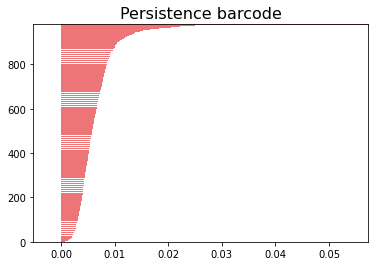

In [186]:
rips_complex = gudhi.RipsComplex(points)
simplex_tree = rips_complex.create_simplex_tree()

diag = simplex_tree.persistence()
pers_file = 'rips.pers'
simplex_tree.write_persistence_diagram(pers_file)

gudhi.plot_persistence_barcode(diag)
plt.show()

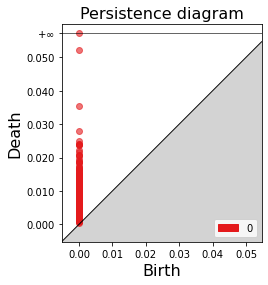

In [187]:
ax = gudhi.plot_persistence_diagram(
    persistence_file=pers_file,
    legend=True)
ax.set_aspect("equal")
plt.show()

In [188]:
fmt = '%s -> %.2f'
for filtered_value in simplex_tree.get_filtration():
    print(fmt % tuple(filtered_value))

[0] -> 0.00
[1] -> 0.00
[2] -> 0.00
[3] -> 0.00
[4] -> 0.00
[5] -> 0.00
[6] -> 0.00
[7] -> 0.00
[8] -> 0.00
[9] -> 0.00
[10] -> 0.00
[11] -> 0.00
[12] -> 0.00
[13] -> 0.00
[14] -> 0.00
[15] -> 0.00
[16] -> 0.00
[17] -> 0.00
[18] -> 0.00
[19] -> 0.00
[20] -> 0.00
[21] -> 0.00
[22] -> 0.00
[23] -> 0.00
[24] -> 0.00
[25] -> 0.00
[26] -> 0.00
[27] -> 0.00
[28] -> 0.00
[29] -> 0.00
[30] -> 0.00
[31] -> 0.00
[32] -> 0.00
[33] -> 0.00
[34] -> 0.00
[35] -> 0.00
[36] -> 0.00
[37] -> 0.00
[38] -> 0.00
[39] -> 0.00
[40] -> 0.00
[41] -> 0.00
[42] -> 0.00
[43] -> 0.00
[44] -> 0.00
[45] -> 0.00
[46] -> 0.00
[47] -> 0.00
[48] -> 0.00
[49] -> 0.00
[50] -> 0.00
[51] -> 0.00
[52] -> 0.00
[53] -> 0.00
[54] -> 0.00
[55] -> 0.00
[56] -> 0.00
[57] -> 0.00
[58] -> 0.00
[59] -> 0.00
[60] -> 0.00
[61] -> 0.00
[62] -> 0.00
[63] -> 0.00
[64] -> 0.00
[65] -> 0.00
[66] -> 0.00
[67] -> 0.00
[68] -> 0.00
[69] -> 0.00
[70] -> 0.00
[71] -> 0.00
[72] -> 0.00
[73] -> 0.00
[74] -> 0.00
[75] -> 0.00
[76] -> 0.00
[77] -> 0

[182, 882] -> 0.06
[266, 325] -> 0.06
[408, 693] -> 0.06
[71, 193] -> 0.06
[33, 548] -> 0.06
[365, 568] -> 0.06
[388, 783] -> 0.06
[275, 382] -> 0.06
[142, 717] -> 0.06
[629, 847] -> 0.06
[269, 556] -> 0.06
[373, 904] -> 0.06
[297, 724] -> 0.06
[424, 707] -> 0.06
[633, 840] -> 0.06
[399, 740] -> 0.06
[649, 657] -> 0.06
[142, 545] -> 0.06
[35, 264] -> 0.06
[696, 952] -> 0.06
[335, 625] -> 0.06
[156, 557] -> 0.06
[107, 711] -> 0.06
[581, 978] -> 0.06
[362, 521] -> 0.06
[106, 122] -> 0.06
[148, 741] -> 0.06
[340, 853] -> 0.06
[142, 616] -> 0.06
[599, 923] -> 0.06
[761, 803] -> 0.06
[157, 674] -> 0.06
[637, 932] -> 0.06
[44, 401] -> 0.06
[530, 823] -> 0.06
[256, 795] -> 0.06
[394, 407] -> 0.06
[223, 276] -> 0.06
[14, 632] -> 0.06
[275, 966] -> 0.06
[610, 853] -> 0.06
[656, 719] -> 0.06
[279, 978] -> 0.06
[425, 492] -> 0.06
[35, 666] -> 0.06
[397, 808] -> 0.06
[646, 940] -> 0.06
[669, 847] -> 0.06
[294, 590] -> 0.06
[65, 916] -> 0.06
[383, 849] -> 0.06
[881, 924] -> 0.06
[899, 941] -> 0.06


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



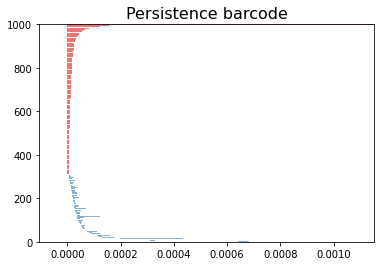

In [189]:
alpha_complex = gudhi.AlphaComplex(points)
simplex_tree = alpha_complex.create_simplex_tree()

diag = simplex_tree.persistence()

pers_file = 'alpha.pers'
simplex_tree.write_persistence_diagram(pers_file)

gudhi.plot_persistence_barcode(diag)
plt.show()

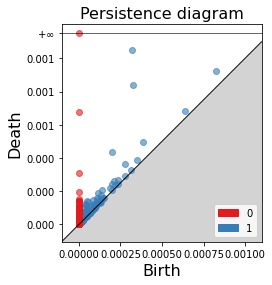

In [190]:
ax = gudhi.plot_persistence_diagram(
    persistence_file=pers_file,
    legend=True)
ax.set_aspect("equal")
plt.show()